In [1]:
#Ignas Kunickas MMT 4k.


In [20]:
#DNN

In [2]:
import os
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
cwd = os.getcwd() #parodo kas content folderyje
print(cwd)
os.listdir(os.getcwd())

/notebooks


['.ipynb_checkpoints',
 'Untitled Folder',
 'logs',
 'Flatland_IK.html',
 'Flatland_IK.ipynb',
 'Untitled.html',
 'Untitled.ipynb',
 'flatland_train.data',
 'model.CNN.h5',
 'storage',
 'datasets',
 'core']

In [5]:
import gzip
import pickle

X,y = pickle.load(gzip.open('flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0
#X = X / 255 #su DNN


In [16]:

#plt.figure(figsize=(10, 3))
#for i in range(10):
#    plt.subplot(3, 10, i + 1)
#    plt.imshow(X[i], cmap='gray')
#    plt.axis('off')
#plt.show()

In [12]:
#PVZ modelio, nukopinu nuo destytojo
NAME = "DNN".format(int(time.time()))
#print(NAME) 
image = keras.layers.Input(shape=[50,50,1])                   # model = keras.models.Sequential()
#Sluoksniai
out = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(image) # ismoko svarbias formas ir mazina paveiksliukus kaip pav 
out= keras.layers.BatchNormalization(axis=-1)(out) # sunormalizuoja duomenis t.y.: suskaiciuoja vidurki, atima is jo ir padalina is standartinio nuokrypio
#out= keras.layers.Activation("relu")(out)
out = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(out)
out= keras.layers.BatchNormalization(axis=-1)(out) # normalizuoja duomenis
#out= keras.layers.Activation("relu")(out)
#ismokes svarbias formas naudojam kaip feacerius treniruodamas modeli
out = keras.layers.MaxPooling2D(pool_size=(2, 2))(out) #mazina sluoksnius, lieka maziau info ir greiciau treniruojasi subsamplingas

out = keras.layers.Flatten()(out)                         # vietoj model.add(keras.layers.Flatten(input_shape=[50, 50])) 
out = keras.layers.Dense(64, activation="relu")(out)        # model.add(keras.layers.Dense(64, activation="relu"))  # neuro tinklas dazniausaiia siaureja ( mazinam neuronu kieki)
#out = keras.layers.Dense(64, activation="relu")(out)        # model.add(keras.layers.Dense(64, activation="relu"))
out = keras.layers.Dense(10, activation="relu")(out) 
#out = keras.layers.Dropout(0.5)(out) # ismetas kaikuriuos neuronus kurie per daug ismoke ta pacia info
out = keras.layers.Dense(5, activation="softmax")(out)      # vietoj model.add(keras.layers.Dense(5, activation="softmax")) #cia 5, nes turim 5 figuros

model = keras.models.Model(inputs=[image], outputs=[out])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", # keras.optimizers.Adam(lr=3e-4) gaunu -8%
              metrics=["accuracy"])
model.summary()



Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 23, 23, 32)       

In [82]:
#Adam?

In [20]:
#model.fit?


In [21]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
loss = model.fit(X, y, epochs=20, validation_split=0.2, callbacks=tensorboard, batch_size=64)  #treniruojam 
# default bat=32, bet nustaciau 64 ,kad jam isvestine skaiciuot per didesni keiki paveiksliuku

Epoch 1/20
125/125 [==============================] - 48s 386ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.0612 - val_accuracy: 0.9780
Epoch 2/20
125/125 [==============================] - 49s 390ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.0421 - val_accuracy: 0.9860
Epoch 3/20
125/125 [==============================] - 49s 396ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9855
Epoch 4/20
125/125 [==============================] - 50s 399ms/step - loss: 7.2843e-04 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9855
Epoch 5/20
125/125 [==============================] - 50s 399ms/step - loss: 7.2215e-04 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 0.9850
Epoch 6/20
125/125 [==============================] - 48s 387ms/step - loss: 5.3893e-04 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9865
Epoch 7/20
125/125 [==============================] - 48s 388ms/step - loss: 4.4502e-04 - accuracy: 1.0000 - val_loss:

In [12]:
#%tensorboard --logdir logs/scalars

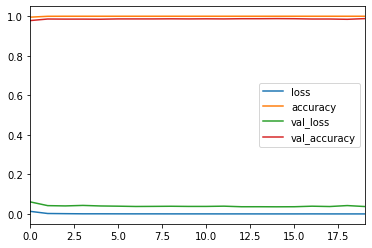

In [22]:
pd.DataFrame(loss.history).plot()

In [25]:
model.save('model.CNN.h5') 

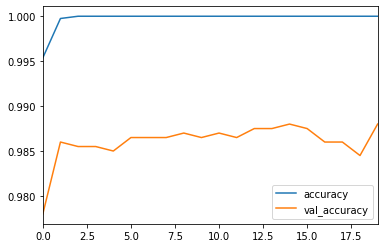

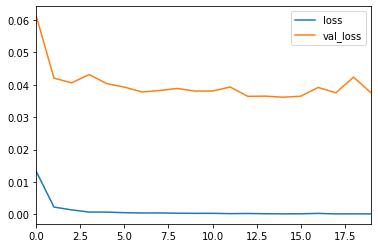

In [23]:
pd.DataFrame(loss.history)[['accuracy', 'val_accuracy']].plot()
 # nestabilumas loss kreiveje kaltinit arba learning rate arba pati data seta
                            
# imant leanring_rate 0.02 matosi bangavima
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot() # loss isryskina paklaidas kurios yra treniruojamos

In [24]:
#from google.colab import files
#files.download('model.h5') 
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 99.76%


In [42]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).batch(32).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.CNN.h5')
evaluate('flatland_train.data', model)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'batch'

In [56]:
#Adam?